<a href="https://colab.research.google.com/github/cesarrivera52/Concentracion2/blob/main/Regresi%C3%B3n%20Multiple/Act_Regresion_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('datos_limpios_iqr.csv')

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34664 entries, 0 to 34663
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_name                       34664 non-null  object 
 1   host_since                      34664 non-null  object 
 2   host_location                   34664 non-null  object 
 3   host_response_time              34664 non-null  object 
 4   host_is_superhost               34664 non-null  object 
 5   host_neighbourhood              34664 non-null  object 
 6   host_verifications              34664 non-null  object 
 7   host_has_profile_pic            34664 non-null  object 
 8   host_identity_verified          34664 non-null  object 
 9   neighbourhood                   34664 non-null  object 
 10  neighbourhood_cleansed          34664 non-null  object 
 11  property_type                   34664 non-null  object 
 12  room_type                       

In [ ]:
#Eliminamos las columnas tipo string
df_rio_Numerica=df.select_dtypes('float64','int')

##Rio de Janeiro

In [ ]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors=df_rio_Numerica.corr()
Corr_Factors

,id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
id,1.000000,-0.025025,-0.017318,0.014963,-0.004457,-0.007077,-0.005366,-0.037620,-0.083122,-0.045141,...,-0.090543,0.229504,0.200596,0.241198,0.237492,0.229359,0.160690,0.276022,0.038403,0.218460
host_response_rate,-0.025025,1.000000,0.093410,-0.060843,-0.056345,0.002350,-0.013953,-0.006575,-0.005447,0.000490,...,0.022801,0.019078,0.021090,0.019244,0.003761,-0.002054,-0.013183,0.016971,-0.039233,0.019958
host_acceptance_rate,-0.017318,0.093410,1.000000,0.051524,0.042268,-0.019247,0.004012,-0.003986,-0.042542,-0.047273,...,0.272686,-0.046039,-0.042073,-0.037536,-0.103972,-0.089363,-0.088067,-0.015801,0.037068,0.249251
host_listings_count,0.014963,-0.060843,0.051524,1.000000,0.753827,-0.014227,0.048061,-0.008065,-0.026408,-0.057360,...,0.043414,-0.059405,-0.056391,-0.048849,-0.046944,-0.046550,-0.026367,-0.051222,0.795673,0.041989
host_total_listings_count,-0.004457,-0.056345,0.042268,0.753827,1.000000,-0.004892,0.045002,-0.004613,-0.018977,-0.048675,...,0.039579,-0.065243,-0.066137,-0.056785,-0.051566,-0.052687,-0.033088,-0.053984,0.643661,0.026340
latitude,-0.007077,0.002350,-0.019247,-0.014227,-0.004892,1.000000,0.387683,-0.118622,-0.090119,-0.089660,...,-0.006899,0.016308,0.014241,0.006694,0.007473,0.004399,-0.010579,0.024614,-0.008383,-0.030529
longitude,-0.005366,-0.013953,0.004012,0.048061,0.045002,0.387683,1.000000,-0.040424,-0.050625,-0.086028,...,0.105498,-0.026598,-0.017704,-0.025367,-0.027646,-0.040904,0.054125,-0.019142,0.049267,0.061815
accommodates,-0.037620,-0.006575,-0.003986,-0.008065,-0.004613,-0.118622,-0.040424,1.000000,0.452378,0.602983,...,0.018173,-0.023682,-0.023070,-0.042546,-0.016980,-0.018450,0.005130,-0.030507,-0.018165,0.010418
bathrooms,-0.083122,-0.005447,-0.042542,-0.026408,-0.018977,-0.090119,-0.050625,0.452378,1.000000,0.599009,...,-0.051251,0.019876,0.009760,-0.002327,0.012181,0.006697,0.030972,-0.012289,-0.037266,-0.077730
bedrooms,-0.045141,0.000490,-0.047273,-0.057360,-0.048675,-0.089660,-0.086028,0.602983,0.599009,1.000000,...,-0.048681,0.018866,0.011433,0.000659,0.020975,0.011955,0.024846,-0.005292,-0.067167,-0.068055


In [ ]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1


,id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
id,1.000000,0.025025,0.017318,0.014963,0.004457,0.007077,0.005366,0.037620,0.083122,0.045141,...,0.090543,0.229504,0.200596,0.241198,0.237492,0.229359,0.160690,0.276022,0.038403,0.218460
host_response_rate,0.025025,1.000000,0.093410,0.060843,0.056345,0.002350,0.013953,0.006575,0.005447,0.000490,...,0.022801,0.019078,0.021090,0.019244,0.003761,0.002054,0.013183,0.016971,0.039233,0.019958
host_acceptance_rate,0.017318,0.093410,1.000000,0.051524,0.042268,0.019247,0.004012,0.003986,0.042542,0.047273,...,0.272686,0.046039,0.042073,0.037536,0.103972,0.089363,0.088067,0.015801,0.037068,0.249251
host_listings_count,0.014963,0.060843,0.051524,1.000000,0.753827,0.014227,0.048061,0.008065,0.026408,0.057360,...,0.043414,0.059405,0.056391,0.048849,0.046944,0.046550,0.026367,0.051222,0.795673,0.041989
host_total_listings_count,0.004457,0.056345,0.042268,0.753827,1.000000,0.004892,0.045002,0.004613,0.018977,0.048675,...,0.039579,0.065243,0.066137,0.056785,0.051566,0.052687,0.033088,0.053984,0.643661,0.026340
latitude,0.007077,0.002350,0.019247,0.014227,0.004892,1.000000,0.387683,0.118622,0.090119,0.089660,...,0.006899,0.016308,0.014241,0.006694,0.007473,0.004399,0.010579,0.024614,0.008383,0.030529
longitude,0.005366,0.013953,0.004012,0.048061,0.045002,0.387683,1.000000,0.040424,0.050625,0.086028,...,0.105498,0.026598,0.017704,0.025367,0.027646,0.040904,0.054125,0.019142,0.049267,0.061815
accommodates,0.037620,0.006575,0.003986,0.008065,0.004613,0.118622,0.040424,1.000000,0.452378,0.602983,...,0.018173,0.023682,0.023070,0.042546,0.016980,0.018450,0.005130,0.030507,0.018165,0.010418
bathrooms,0.083122,0.005447,0.042542,0.026408,0.018977,0.090119,0.050625,0.452378,1.000000,0.599009,...,0.051251,0.019876,0.009760,0.002327,0.012181,0.006697,0.030972,0.012289,0.037266,0.077730
bedrooms,0.045141,0.000490,0.047273,0.057360,0.048675,0.089660,0.086028,0.602983,0.599009,1.000000,...,0.048681,0.018866,0.011433,0.000659,0.020975,0.011955,0.024846,0.005292,0.067167,0.068055


<Axes: >

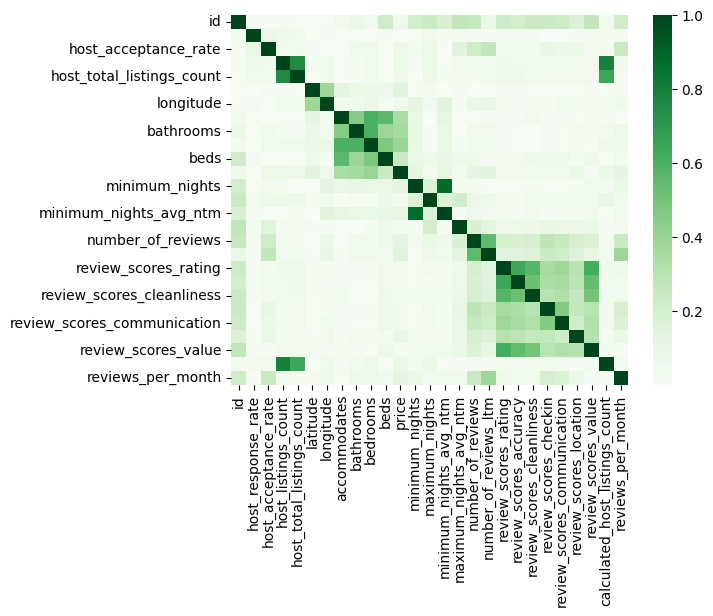

In [ ]:
#Ajustamos el mapa de calor de los coeficientes de correlacion
Heat_Map= sns.heatmap(Corr_Factors1, cmap='Greens',fmt='.2f')
Heat_Map

#  (host_id, host_acceptance_rate, host_is_superhost, host_total_listings_count, room_type, accommodates, bedrooms, Price, review_scores_value y reviews_per_month)

ValueError: Could not interpret value `host_is_superhost` for `y`. An entry with this name does not appear in `data`.

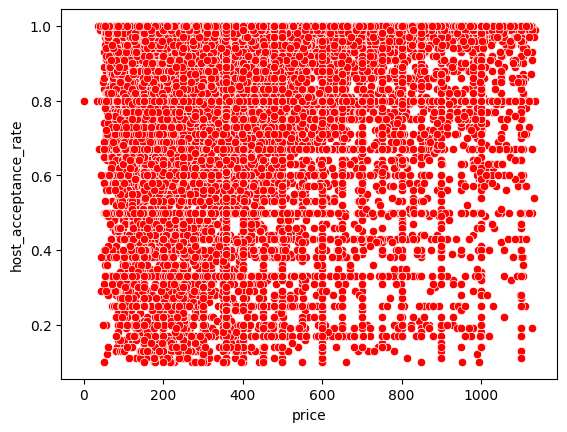

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión
from turtle import color

#sns.scatterplot(x='price',y='host_id',color='blue',data=df_rio_Numerica)
sns.scatterplot(x='price',y='host_acceptance_rate',color='red',data=df_rio_Numerica)
sns.scatterplot(x='price',y='host_is_superhost',color='green',data=df_rio_Numerica)
sns.scatterplot(x='price',y='room_type',color='orange',data=df_rio_Numerica)
sns.scatterplot(x='price',y='accommodates',color='gray',data=df_rio_Numerica)
sns.scatterplot(x='price',y='bedrooms',color='purple',data=df_rio_Numerica)
sns.scatterplot(x='price',y='price',color='black',data=df_rio_Numerica)
sns.scatterplot(x='price',y='review_scores_value',color='skyblue',data=df_rio_Numerica)


In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol','speeding]]
Vars_Indep= df[['host_id','host_acceptance_rate','host_is_superhost','host_total_listings_count','room_type','accommodates','bedrooms','price', 'review_scores_value','reviews_per_month']]
Var_Dep=df['host_total_listings_count']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la funcion relacionada al modelo
type(model)

In [ ]:
#ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Modelo matemático:

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred=model.predict(X=df[['alcohol','speeding']])
y_pred= model.predict(X=df[['alcohol','not_distracted','no_previous']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DF
#El 0 indica en q' posición del DF se guarda
df.insert(0,'Predicciones',y_pred)
df.head()

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='alcohol',y='total',color='blue',data=df)
sns.scatterplot(x='alcohol',y='Predicciones',color='red',data=df)
sns.lineplot(x='alcohol', y='Predicciones',color='red', data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep,y=Var_Dep)
coef_Deter

In [ ]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo(R)
coef_Deter1=np.sqrt(coef_Deter)
coef_Deter1